In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("E:\\pro\\ml-latest\\genome-scores.csv")

In [3]:
df.head()

,movieId,tagId,relevance
0,1,1,0.02900
1,1,2,0.02375
2,1,3,0.05425
3,1,4,0.06875
4,1,5,0.16000


In [4]:
m_title=pd.read_csv("E:\\pro\\ml-latest\\movies.csv")

In [5]:
m_title.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df = pd.merge(df,m_title,on='movieId')

In [7]:
df.head()

,movieId,tagId,relevance,title,genres
0,1,1,0.02900,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,2,0.02375,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,1,3,0.05425,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,1,4,0.06875,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,1,5,0.16000,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [9]:
df.groupby('title')['relevance'].mean().sort_values(ascending=False).head()

title
Sherlock - A Study in Pink (2010)             0.328598
Welcome to Dongmakgol (2005)                  0.309769
Band Called Death, A (2012)                   0.297122
Confession of Murder (2012)                   0.283310
Patton Oswalt: Talking for Clapping (2016)    0.259640
Name: relevance, dtype: float64

In [10]:
df.groupby('title')['relevance'].count().sort_values(ascending=False).head()

title
Emma (1996)                               2256
War of the Worlds (2005)                  2256
Confessions of a Dangerous Mind (2002)    2256
"Great Performances" Cats (1998)          1128
Past, The (Le passé) (2013)               1128
Name: relevance, dtype: int64

In [11]:
relevance = pd.DataFrame(df.groupby('title')['relevance'].mean())
relevance.head()

,relevance
title,
"""Great Performances"" Cats (1998)",0.097704
$5 a Day (2008),0.116312
$9.99 (2008),0.094136
'71 (2014),0.113324
'Hellboy': The Seeds of Creation (2004),0.115221


In [12]:
relevance['num of relevance'] = pd.DataFrame(df.groupby('title')['relevance'].count())
relevance.head()

,relevance,num of relevance
title,,
"""Great Performances"" Cats (1998)",0.097704,1128
$5 a Day (2008),0.116312,1128
$9.99 (2008),0.094136,1128
'71 (2014),0.113324,1128
'Hellboy': The Seeds of Creation (2004),0.115221,1128


<AxesSubplot:>

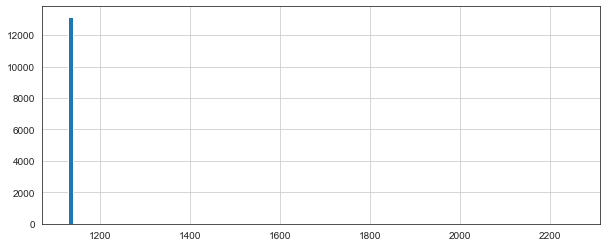

In [13]:
plt.figure(figsize=(10,4))
relevance['num of relevance'].hist(bins=100)

<AxesSubplot:>

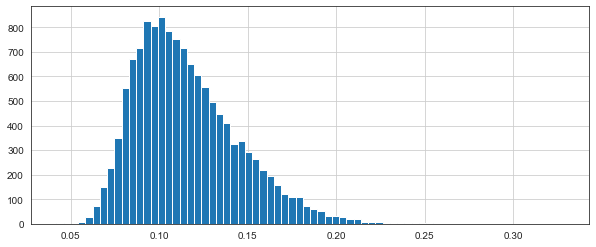

In [14]:
plt.figure(figsize=(10,4))
relevance['relevance'].hist(bins=70)

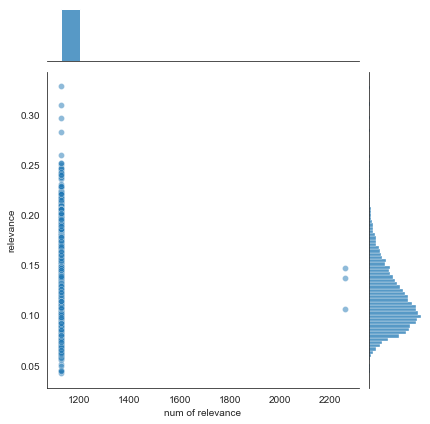

In [15]:
sns.jointplot(x='num of relevance',y='relevance',data=relevance,alpha=0.5)

In [16]:
moviemat = df.pivot_table(index='tagId',columns='title',values='relevance')
moviemat.head()

title,"""Great Performances"" Cats (1998)",$5 a Day (2008),$9.99 (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),...,[REC]² (2009),[REC]³ 3 Génesis (2012),eXistenZ (1999),iBoy (2017),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: Return of Xander Cage (2017),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
tagId,,,,,,,,,,,,,,,,,,,,,
1,0.04650,0.17825,0.01775,0.01425,0.02700,0.02075,0.03800,0.04600,0.02975,0.02175,...,0.04175,0.03825,0.02400,0.03325,0.02450,0.91600,0.30575,0.68250,0.04000,0.01625
2,0.05525,0.18275,0.02375,0.01400,0.02250,0.02275,0.03650,0.05175,0.02750,0.02525,...,0.04175,0.03325,0.02125,0.03075,0.02750,0.95825,0.04775,0.10075,0.04525,0.01950
3,0.04800,0.01775,0.01900,0.04575,0.03825,0.04325,0.21825,0.03975,0.03400,0.03175,...,0.03725,0.07250,0.09950,0.04150,0.05950,0.02650,0.02400,0.02375,0.03175,0.08050
4,0.03850,0.01700,0.03550,0.04950,0.04600,0.06575,0.06550,0.03900,0.03450,0.03050,...,0.05525,0.03025,0.05475,0.03625,0.05325,0.03500,0.02700,0.02475,0.08675,0.27675
5,0.07125,0.21725,0.07950,0.12775,0.09225,0.39350,0.05900,0.05325,0.09950,0.06550,...,0.10450,0.06175,0.04700,0.06050,0.11825,0.03500,0.03200,0.03025,0.08275,0.78300


In [18]:
relevance.sort_values('num of relevance',ascending=False).head

<bound method NDFrame.head of                                                    relevance  num of relevance
title                                                                         
Emma (1996)                                         0.105950              2256
War of the Worlds (2005)                            0.137476              2256
Confessions of a Dangerous Mind (2002)              0.147102              2256
"Great Performances" Cats (1998)                    0.097704              1128
Past, The (Le passé) (2013)                         0.120262              1128
...                                                      ...               ...
From Russia with Love (1963)                        0.143605              1128
From Up on Poppy Hill (Kokuriko-zaka kara) (2011)   0.156169              1128
From the Earth to the Moon (1998)                   0.172217              1128
From the Hip (1987)                                 0.110905              1128
À nous la liberté (Fre

In [19]:
relevance.head()

,relevance,num of relevance
title,,
"""Great Performances"" Cats (1998)",0.097704,1128
$5 a Day (2008),0.116312,1128
$9.99 (2008),0.094136,1128
'71 (2014),0.113324,1128
'Hellboy': The Seeds of Creation (2004),0.115221,1128


In [23]:
starwars_user_relevance = moviemat['$5 a Day (2008)']
liarliar_user_relevance = moviemat['$9.99 (2008)']
starwars_user_relevance.head()

tagId
1    0.17825
2    0.18275
3    0.01775
4    0.01700
5    0.21725
Name: $5 a Day (2008), dtype: float64

In [24]:
similar_to_starwars = moviemat.corrwith(starwars_user_relevance)
similar_to_liarliar = moviemat.corrwith(liarliar_user_relevance)


In [25]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
"""Great Performances"" Cats (1998)",0.404074
$5 a Day (2008),1.000000
$9.99 (2008),0.363897
'71 (2014),0.315222
'Hellboy': The Seeds of Creation (2004),0.450926


In [26]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
$5 a Day (2008),1.000000
Duets (2000),0.622462
"Jeff, Who Lives at Home (2012)",0.603878
Waking Up in Reno (2002),0.598059
Larger Than Life (1996),0.582458
"Great Buck Howard, The (2008)",0.579468
Lapland Odyssey (Napapiirin sankarit) (2010),0.577392
Mr. Saturday Night (1992),0.577134
Roommates (1995),0.574979


In [27]:
corr_starwars = corr_starwars.join(relevance['num of relevance'])
corr_starwars.head()

,Correlation,num of relevance
title,,
"""Great Performances"" Cats (1998)",0.404074,1128
$5 a Day (2008),1.000000,1128
$9.99 (2008),0.363897,1128
'71 (2014),0.315222,1128
'Hellboy': The Seeds of Creation (2004),0.450926,1128


In [28]:
corr_starwars[corr_starwars['num of relevance']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of relevance
title,,
$5 a Day (2008),1.000000,1128
Duets (2000),0.622462,1128
"Jeff, Who Lives at Home (2012)",0.603878,1128
Waking Up in Reno (2002),0.598059,1128
Larger Than Life (1996),0.582458,1128


In [29]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(relevance['num of relevance'])
corr_liarliar[corr_liarliar['num of relevance']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of relevance
title,,
$9.99 (2008),1.000000,1128
"Secret Adventures of Tom Thumb, The (1993)",0.621417,1128
Small Apartments (2012),0.604001,1128
Bringing Out the Dead (1999),0.592667,1128
Montenegro (1981),0.589604,1128
